<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/main/TF_IDF_KMEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kode yang jadi yang cari sendiri**

## **Import Data**

In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

dm = pd.read_csv("https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv", usecols=["tweet_clean", "sentiment"])
dm.columns = ["tweet_clean", "sentiment"]
dm.head(10)

,tweet_clean,sentiment
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",negative
1,"['accounts', 'recognised', 'ramadan', 'none', ...",negative
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",positive
3,"['admin', 'post', 'ramadan', 'norway']",negative
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",positive
5,"['alfas', 'inside', 'mega', 'chicken', 'aftern...",negative
6,"['alhamdulillah', 'every', 'lesson', 'every', ...",positive
7,"['allah', 'forgive', 'us', 'sins', 'past', 'fu...",positive
8,"['allah', 'help', 'brothers', 'gaza', 'lift', ...",positive
9,"['allah', 'help', 'us', 'al-aqsa', 'prisons', ...",negative


## **Menggabungkan string list menjadi string**

In [68]:
# Menggabungkan string list menjadi string biasa
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
dm["tweet_join"] = dm["tweet_clean"].apply(join_text_list)

dm["tweet_join"].head()

,tweet_join
0,abraj al bait clock tower beams indicating com...
1,accounts recognised ramadan none recognised be...
2,admin post peaceful ramadan celebrations east ...
3,admin post ramadan norway
4,admin post ramadan usual peaceful start englan...


## **Menghitung TF-IDF**

Menghitung TF-IDF menggunakan TfidfVectorizer
Untuk menghitung TF-IDF menggunakan Scikit-Learn, dapat dilakukan dengan cara berikut,

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, ngram_range=(1,2),
    stop_words='english')
tf_idf.fit(dm["tweet_join"])  # Melakukan fitting terlebih dahulu
tfidf_mat = tf_idf.transform(dm["tweet_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (836, 1000)


## **Hasil Matriks TF‑IDF**

Hasil dari Matriks TF-IDF yang diubah ke dataframe

In [70]:
import pandas as pd

# Mengambil nama fitur (term)
feature_names = tf_idf.get_feature_names_out()

# Membuat DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=feature_names)

# Menampilkan DataFrame
display(df_tfidf.head(20))

,able,abu,accept,accepted,according,accounts,act,action,acts,additionally,...,ya,ya allah,year,year old,years,yes,yesterday,york,young,zazzau
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.385008,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Baris mewakili tiap dokumen/data, sedangkan kolom menunjukkan semua kata yang ada di dalam korpus. Jika sebuah kata muncul dalam suatu dokumen, maka pada perpotongan baris dan kolom tersebut akan terisi nilai TF‑IDF-nya.

## **Menampilkan ke dalam list**

50 Term Teratas dengan Total TF‑IDF Tertinggi

In [71]:
terms = tf_idf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
682,ramadan,88.916994
533,month,25.084733
24,allah,19.393749
545,mubarak,17.575222
713,ramadan mubarak,17.420638
...,...,...
828,sonam kapoor,0.491219
440,kapoor,0.491219
853,starving gaza,0.472209
275,fasting fasting,0.444865


In [72]:
# Memasukan matrix tf_idf dan kelas sentimen ke X dan y
X, y = tfidf_mat, dm['sentiment']

In [73]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 70% training and 30% test

## **Visualisasi data sebelum di modelkan menggunakan pca karena kolom terlalu banyak**

In [74]:
# Memilih kolom pca
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Mendapatkan nama kolom
col_pca = pca.get_feature_names_out(input_features=None)

# Menjadikan pca menjadi datatframe
df_pca = pd.DataFrame(X_pca, columns=col_pca)
df_pca

,pca0,pca1,pca2
0,-0.016555,-0.005622,-0.107873
1,-0.033008,-0.008596,0.339954
2,-0.038634,-0.045482,-0.064685
3,0.042006,0.069429,0.022835
4,-0.062007,0.004174,0.135902
...,...,...,...
580,0.002635,-0.050337,-0.052458
581,-0.090242,-0.022603,-0.105346
582,-0.056972,0.010852,0.239542
583,-0.027444,-0.035109,0.019853


<Axes: xlabel='pca0', ylabel='pca1'>

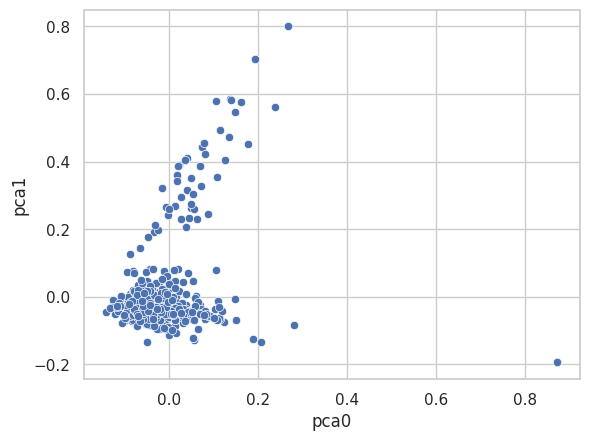

In [75]:
# Visualisasi
sns.scatterplot(x='pca0', y='pca1', data=df_pca)

## **Training model**

In [76]:
# # Menambahkan score untuk menentukan k terbaik
# silhouette_score(X_train, kmeans.labels_, metric='euclidean')

In [77]:
K = range(2, 8)
fits = []
score = []
# score_sil = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(model.inertia_)
    # score_sil.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

## **Menentukan K terbaik dengan elbow method**

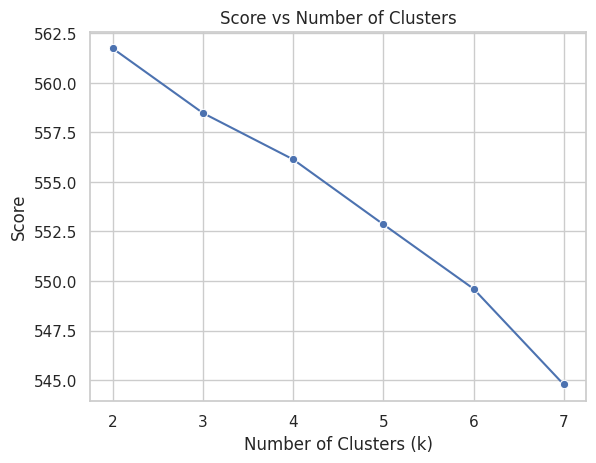

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming K and score are already defined
sns.set(style='whitegrid')
sns.lineplot(x=K, y=score, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Score vs Number of Clusters')
plt.show()


<Axes: xlabel='pca0', ylabel='pca1'>

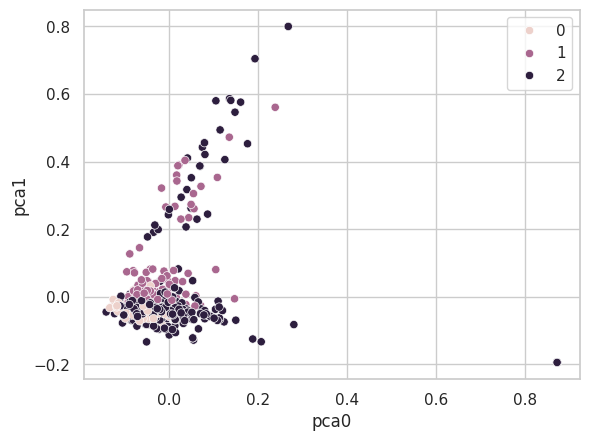

In [79]:
# Visualisasi menggunakan scatter plot menggunakan k terbaik, yaitu 3
sns.scatterplot(data = df_pca, x = 'pca0', y = 'pca1', hue = fits[1].labels_)

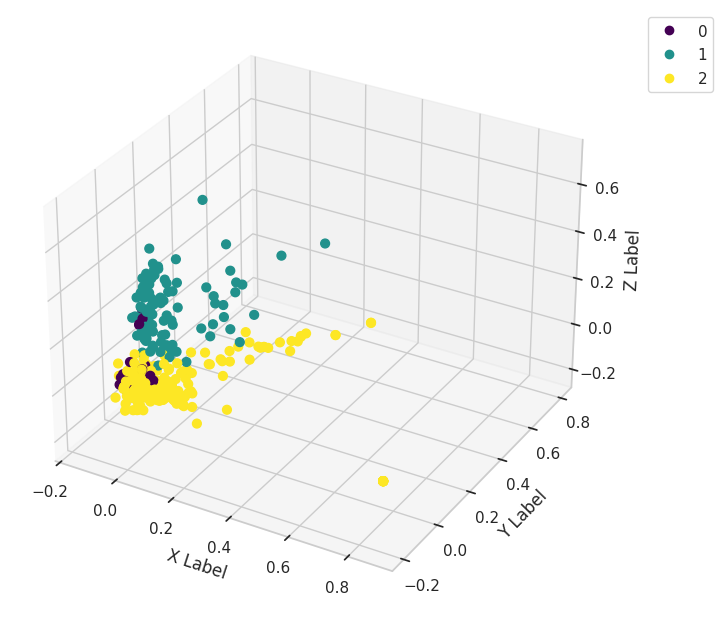

In [83]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = df_pca['pca0']
y = df_pca['pca1']
z = df_pca['pca2']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=fits[1].labels_, marker='o', cmap='viridis', alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [84]:
import plotly.express as px
fig = px.scatter_3d(x=x, y=y, z=z,
              color=fits[1].labels_)
fig.show()